In [1]:
import os
import copy
import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_workbook(path: str):
    # Read all sheets into a dict of DataFrames
    # keys: sheet names, values: full sheet DataFrames
    print(path)
    sheets = pd.read_excel(path, sheet_name=None, engine="openpyxl", header=None)

    result = {}

    for sheet_name, df in sheets.items():
        # Reset index to make row slicing easier
        df = df.reset_index(drop=True)

        # ---- Table 1: 43 rows ----
        # Assuming header at row 0, data rows 1–43 inclusive
        table1_header_row = 0
        table1_start_row = 1
        table1_rows = 43

        table1 = df.iloc[table1_start_row : table1_start_row + table1_rows, :]
        table1.columns = df.iloc[table1_header_row, :]  # set header
        # table1 = table1.reset_index(drop=True)
        print(table1.columns)

        # ---- Table 2: 13 rows ----
        # Example: header at row 45, data rows 46–58 (13 rows)
        table2_header_row = 46
        table2_start_row = 47
        table2_rows = 13

        table2 = df.iloc[table2_start_row : table2_start_row + table2_rows, :]
        table2.columns = df.iloc[table2_header_row, :]
        # table2 = table2.reset_index(drop=True)
        print(table2.columns)

        # Optionally, select only the expected columns
        expected_cols = ["Filename", "Response"]
        table1 = table1[expected_cols]
        table2 = table2[expected_cols]

        # Store in a structured way
        result[sheet_name] = {
            "adapter": table1,
            "singleton": table2,
        }

    return result

In [3]:
outputs = ["code", "uml"]
models = [
    "qwen/qwen-2.5-coder-32b-instruct",
    "rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF",
    "TheBloke/deepseek-coder-6.7B-instruct-GGUF",
]

complete_data = {}
for output_type in outputs:
    complete_data[output_type] = {}

for output_type, model in product(outputs, models):
    # Generate the file path for each excel file
    FILE_PATH = os.path.join(
        f"{output_type}-outputs",
        model,
        "responses.xlsx",
    )
    
    # Store them in a full dataset
    data = read_workbook(FILE_PATH)
    complete_data[output_type][model] = data

code-outputs/qwen/qwen-2.5-coder-32b-instruct/responses.xlsx
Index([0.0, 'Filename', 'Response'], dtype='object', name=0)
Index([nan, 'Filename', 'Response'], dtype='object', name=46)
Index([nan, 'Filename', 'Response'], dtype='object', name=0)
Index([nan, 'Filename', 'Response'], dtype='object', name=46)
code-outputs/rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF/responses.xlsx
Index([nan, 'Filename', 'Response'], dtype='object', name=0)
Index([nan, 'Filename', 'Response'], dtype='object', name=46)
Index([nan, 'Filename', 'Response'], dtype='object', name=0)
Index([nan, 'Filename', 'Response'], dtype='object', name=46)
code-outputs/TheBloke/deepseek-coder-6.7B-instruct-GGUF/responses.xlsx
Index([nan, 'Filename', 'Response'], dtype='object', name=0)
Index([nan, 'Filename', 'Response'], dtype='object', name=46)
Index([nan, 'Filename', 'Response'], dtype='object', name=0)
Index([nan, 'Filename', 'Response'], dtype='object', name=46)
uml-outputs/qwen/qwen-2.5-coder-32b-instruct/responses.xlsx
Inde

In [4]:
complete_data

{'code': {'qwen/qwen-2.5-coder-32b-instruct': {'correct': {'adapter': 0                                            Filename Response
    1                  6 - JHotDraw v5.1- SouthHandle.txt        N
    2                 6 - JHotDraw v5.1- RadiusHandle.txt        N
    3                           10 - Nutch v0.4- Page.txt        N
    4                     11 - PMD v1.8- AbstractRule.txt        Y
    5    3 - JRefactory v2.6.24- SourceBrowserAdapter.txt        Y
    6     3 - JRefactory v2.6.24- ReloadActionAdapter.txt        Y
    7             3 - JRefactory v2.6.24- ZoomAdapter.txt        Y
    8               6 - JHotDraw v5.1- PolyLineHandle.txt        N
    9                  6 - JHotDraw v5.1- GroupHandle.txt        N
    10  8 - MapperXML v1.9.7- DOM_1_20000929_DocumentA...        Y
    11                  6 - JHotDraw v5.1- EastHandle.txt        N
    12        3 - JRefactory v2.6.24- UMLMouseAdapter.txt        Y
    13                 6 - JHotDraw v5.1- ElbowHandle.txt      

In [5]:
true_labels = {}

for output_type in complete_data.keys():
    true_labels[output_type] = {}
    for model in complete_data[output_type].keys():
        true_labels[output_type][model] = {}
        model_response = complete_data[output_type][model]
        for correctness in model_response.keys():
            true_labels[output_type][model][correctness] = {}
            correctness_response = model_response[correctness]
            for pattern in correctness_response.keys():
                responses = correctness_response[pattern]
                rows, cols = responses.shape
                label = 'N'
                if correctness=="correct":
                    label = 'Y'
                true_labels[output_type][model][correctness][pattern] = pd.DataFrame(np.full((rows,cols-1), label))

In [6]:
true_labels

{'code': {'qwen/qwen-2.5-coder-32b-instruct': {'correct': {'adapter':     0
    0   Y
    1   Y
    2   Y
    3   Y
    4   Y
    5   Y
    6   Y
    7   Y
    8   Y
    9   Y
    10  Y
    11  Y
    12  Y
    13  Y
    14  Y
    15  Y
    16  Y
    17  Y
    18  Y
    19  Y
    20  Y
    21  Y
    22  Y
    23  Y
    24  Y
    25  Y
    26  Y
    27  Y
    28  Y
    29  Y
    30  Y
    31  Y
    32  Y
    33  Y
    34  Y
    35  Y
    36  Y
    37  Y
    38  Y
    39  Y
    40  Y
    41  Y
    42  Y,
    'singleton':     0
    0   Y
    1   Y
    2   Y
    3   Y
    4   Y
    5   Y
    6   Y
    7   Y
    8   Y
    9   Y
    10  Y
    11  Y
    12  Y},
   'incorrect': {'adapter':     0
    0   N
    1   N
    2   N
    3   N
    4   N
    5   N
    6   N
    7   N
    8   N
    9   N
    10  N
    11  N
    12  N
    13  N
    14  N
    15  N
    16  N
    17  N
    18  N
    19  N
    20  N
    21  N
    22  N
    23  N
    24  N
    25  N
    26  N
    27  N
    28  N
    29  N
    

In [7]:
predicted_labels = {}

for output_type in complete_data.keys():
    predicted_labels[output_type] = {}
    for model in complete_data[output_type].keys():
        predicted_labels[output_type][model] = {}
        model_response = complete_data[output_type][model]
        for correctness in model_response.keys():
            predicted_labels[output_type][model][correctness] = {}
            correctness_response = model_response[correctness]
            for pattern in correctness_response.keys():
                responses = correctness_response[pattern]
                predicted_labels[output_type][model][correctness][pattern] = responses.iloc[:, 1:]

In [8]:
predicted_labels

{'code': {'qwen/qwen-2.5-coder-32b-instruct': {'correct': {'adapter': 0  Response
    1         N
    2         N
    3         N
    4         Y
    5         Y
    6         Y
    7         Y
    8         N
    9         N
    10        Y
    11        N
    12        Y
    13        N
    14        N
    15        Y
    16        Y
    17        Y
    18        Y
    19        Y
    20        N
    21        N
    22        Y
    23        Y
    24        N
    25        Y
    26        N
    27        N
    28        Y
    29        N
    30        N
    31        Y
    32        Y
    33        Y
    34        N
    35        N
    36        Y
    37        N
    38        Y
    39        N
    40        N
    41        N
    42        N
    43        Y,
    'singleton': 46 Response
    47        Y
    48        Y
    49        Y
    50        Y
    51        Y
    52        Y
    53        N
    54        Y
    55        N
    56        Y
    57        Y
    58        Y
    59  

In [ ]:
def compute_metrics(y_true, y_pred):
    return {
        "accuracy": round(accuracy_score(y_true, y_pred), 4),
        "precision": round(float(precision_score(y_true, y_pred, zero_division=0)), 4),
        "recall": round(float(recall_score(y_true, y_pred, zero_division=0)), 4),
        "f1": round(float(f1_score(y_true, y_pred, zero_division=0)), 4),
        "mcc": round(matthews_corrcoef(y_true, y_pred), 4),
        "confusion_matrix": confusion_matrix(y_true, y_pred)
    }

In [14]:
mapping = {"Y":1, "N":0, "Y?":1, "N?":0}

metrics = {}
for output_type in complete_data.keys():
    for model in complete_data[output_type].keys():
        model_response = complete_data[output_type][model]
        for pattern in model_response["correct"].keys():
            print(output_type, model, pattern)
            # print("\n")
            y_true = [
                mapping[v]
                for v in true_labels[output_type][model]["correct"][pattern].iloc[:, 0]
            ] + [
                mapping[v]
                for v in true_labels[output_type][model]["incorrect"][pattern].iloc[:, 0]
            ]
            y_pred = [
                mapping[v]
                for v in predicted_labels[output_type][model]["correct"][pattern].iloc[:, 0]
            ] + [
                mapping[v]
                for v in predicted_labels[output_type][model]["incorrect"][pattern].iloc[:, 0]
            ]
            metrics[(output_type, model, pattern)] = compute_metrics(y_true, y_pred)
            # print("\n")

code qwen/qwen-2.5-coder-32b-instruct adapter
code qwen/qwen-2.5-coder-32b-instruct singleton
code rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF adapter
code rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF singleton
code TheBloke/deepseek-coder-6.7B-instruct-GGUF adapter
code TheBloke/deepseek-coder-6.7B-instruct-GGUF singleton
uml qwen/qwen-2.5-coder-32b-instruct adapter
uml qwen/qwen-2.5-coder-32b-instruct singleton
uml rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF adapter
uml rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF singleton
uml TheBloke/deepseek-coder-6.7B-instruct-GGUF adapter
uml TheBloke/deepseek-coder-6.7B-instruct-GGUF singleton


In [103]:
test_ytrue = (
    [
        mapping[v]
        for v in true_labels["code"]["qwen/qwen-2.5-coder-32b-instruct"]["correct"][
            "singleton"
        ].iloc[:, 0]
    ]
    + [
        mapping[v]
        for v in true_labels["uml"]["qwen/qwen-2.5-coder-32b-instruct"]["correct"][
            "singleton"
        ].iloc[:, 0]
    ]
    + [
        mapping[v]
        for v in true_labels["code"]["qwen/qwen-2.5-coder-32b-instruct"]["incorrect"][
            "singleton"
        ].iloc[:, 0]
    ]
    + [
        mapping[v]
        for v in true_labels["uml"]["qwen/qwen-2.5-coder-32b-instruct"]["incorrect"][
            "singleton"
        ].iloc[:, 0]
    ]
)
test_ypred = (
    [
        mapping[v]
        for v in predicted_labels["code"]["qwen/qwen-2.5-coder-32b-instruct"]["correct"][
            "singleton"
        ].iloc[:, 0]
    ]
    + [
        mapping[v]
        for v in predicted_labels["uml"]["qwen/qwen-2.5-coder-32b-instruct"]["correct"][
            "singleton"
        ].iloc[:, 0]
    ]
    + [
        mapping[v]
        for v in predicted_labels["code"]["qwen/qwen-2.5-coder-32b-instruct"]["incorrect"][
            "singleton"
        ].iloc[:, 0]
    ]
    + [
        mapping[v]
        for v in predicted_labels["uml"]["qwen/qwen-2.5-coder-32b-instruct"]["incorrect"][
            "singleton"
        ].iloc[:, 0]
    ]
)
f1_score(test_ytrue, test_ypred)

0.8979591836734694

In [15]:
metrics

{('code', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter'): {'accuracy': 0.6977,
  'precision': 0.84,
  'recall': 0.4884,
  'f1': 0.6176,
  'mcc': 0.4353,
  'confusion_matrix': array([[39,  4],
         [22, 21]])},
 ('code',
  'qwen/qwen-2.5-coder-32b-instruct',
  'singleton'): {'accuracy': 0.8846, 'precision': 1.0, 'recall': 0.7692, 'f1': 0.8696, 'mcc': 0.7906, 'confusion_matrix': array([[13,  0],
         [ 3, 10]])},
 ('code',
  'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF',
  'adapter'): {'accuracy': 0.5814, 'precision': 0.5556, 'recall': 0.814, 'f1': 0.6604, 'mcc': 0.1839, 'confusion_matrix': array([[15, 28],
         [ 8, 35]])},
 ('code',
  'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF',
  'singleton'): {'accuracy': 0.6154, 'precision': 0.5714, 'recall': 0.9231, 'f1': 0.7059, 'mcc': 0.2928, 'confusion_matrix': array([[ 4,  9],
         [ 1, 12]])},
 ('code',
  'TheBloke/deepseek-coder-6.7B-instruct-GGUF',
  'adapter'): {'accuracy': 0.6512, 'precision': 0.614, 'recall': 0.814, 'f1': 0.7, 'mcc'

('code', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter')


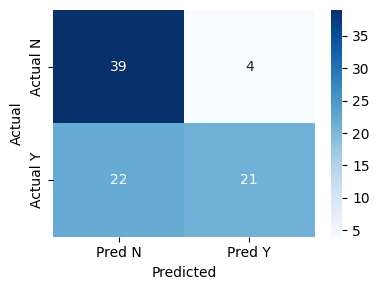

('code', 'qwen/qwen-2.5-coder-32b-instruct', 'singleton')


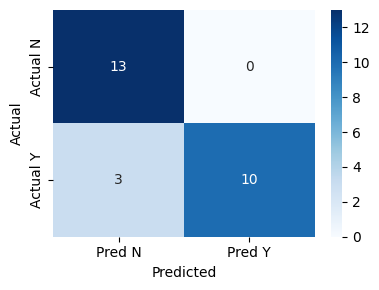

('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter')


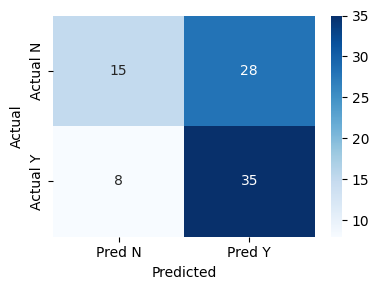

('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton')


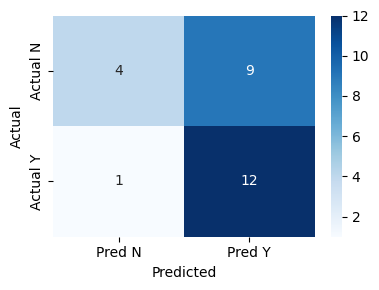

('code', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter')


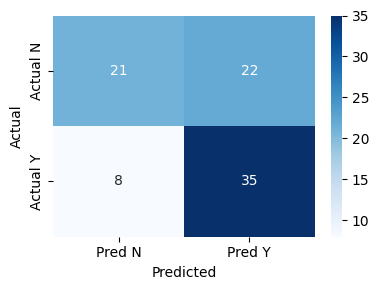

('code', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton')


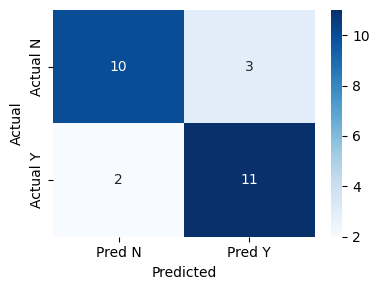

('uml', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter')


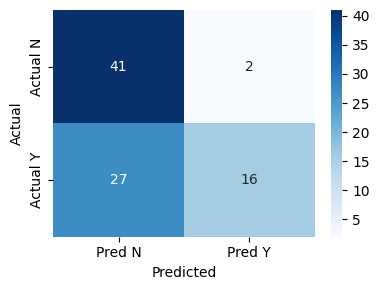

('uml', 'qwen/qwen-2.5-coder-32b-instruct', 'singleton')


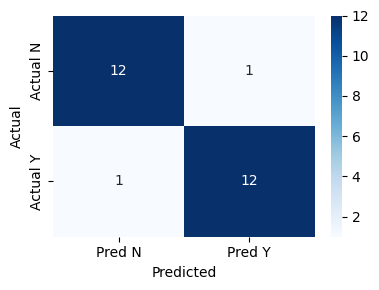

('uml', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter')


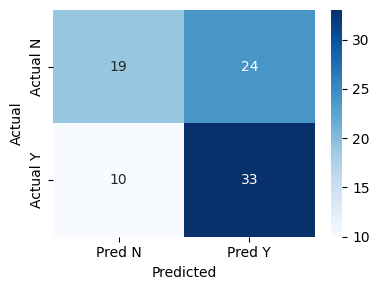

('uml', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton')


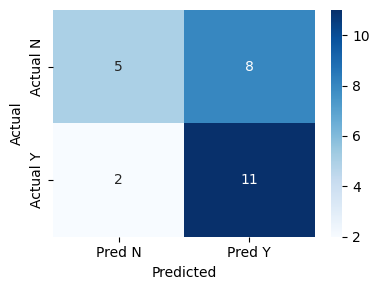

('uml', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter')


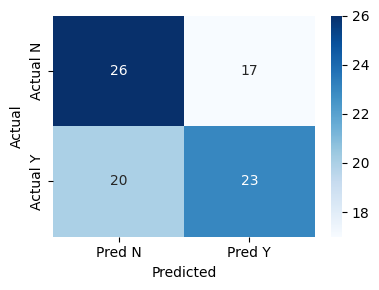

('uml', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton')


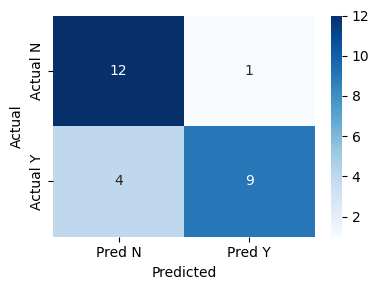

In [149]:
for key in metrics.keys():
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        metrics[key]["confusion_matrix"],
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Pred N", "Pred Y"],
        yticklabels=["Actual N", "Actual Y"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    # plt.title(f"")
    print(key)
    plt.tight_layout()
    plt.show()

In [54]:
avg_model_metrics = {}
avg_type_metrics = {}

for type in outputs:
    print(type + "\n")
    type_dicts = []
    for key in metrics.keys():
        if type in key:
            print(key, metrics[key])
            type_dicts.append(metrics[key])

    avg = {
        key: round(sum(d[key] for d in type_dicts) / len(type_dicts), 4)
        for key in type_dicts[0].keys()
        if key != "confusion_matrix"
    }

    avg_type_metrics[type] = avg

for model in models:
    print(model + "\n")
    model_dicts = []
    for key in metrics.keys():
        if model in key:
            print(metrics[key])
            model_dicts.append(metrics[key])

    avg = {
        key: round(sum(d[key] for d in model_dicts) / len(model_dicts), 4)
        for key in model_dicts[0].keys()
        if key != "confusion_matrix"
    }

    avg_model_metrics[model] = avg

code

('code', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter') {'accuracy': 0.6977, 'precision': 0.84, 'recall': 0.4884, 'f1': 0.6176, 'mcc': 0.4353, 'confusion_matrix': array([[39,  4],
       [22, 21]])}
('code', 'qwen/qwen-2.5-coder-32b-instruct', 'singleton') {'accuracy': 0.8846, 'precision': 1.0, 'recall': 0.7692, 'f1': 0.8696, 'mcc': 0.7906, 'confusion_matrix': array([[13,  0],
       [ 3, 10]])}
('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter') {'accuracy': 0.5814, 'precision': 0.5556, 'recall': 0.814, 'f1': 0.6604, 'mcc': 0.1839, 'confusion_matrix': array([[15, 28],
       [ 8, 35]])}
('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton') {'accuracy': 0.6154, 'precision': 0.5714, 'recall': 0.9231, 'f1': 0.7059, 'mcc': 0.2928, 'confusion_matrix': array([[ 4,  9],
       [ 1, 12]])}
('code', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter') {'accuracy': 0.6512, 'precision': 0.614, 'recall': 0.814, 'f1': 0.7, 'mcc': 0.3197, 'confusion_matrix': array([[21, 

In [55]:
avg_model_metrics

{'qwen/qwen-2.5-coder-32b-instruct': {'accuracy': 0.7921,
  'precision': 0.913,
  'recall': 0.6382,
  'f1': 0.7337,
  'mcc': 0.6181},
 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF': {'accuracy': 0.6042,
  'precision': 0.5712,
  'recall': 0.8377,
  'f1': 0.6784,
  'mcc': 0.2396},
 'TheBloke/deepseek-coder-6.7B-instruct-GGUF': {'accuracy': 0.7091,
  'precision': 0.7187,
  'recall': 0.7218,
  'f1': 0.7129,
  'mcc': 0.4273}}

In [56]:
# model_metrics_wo_cm = copy.deepcopy(avg_model_metrics)

# for key in model_metrics_wo_cm.keys():
#     del model_metrics_wo_cm[key]["confusion_matrix"]

In [131]:
avg_model_metrics = {}
ordered_patterns = ["singleton", "adapter"]
correctness = ["correct", "incorrect"]


for model in models:
    y_true = []
    y_pred = []
    for type in outputs:
        # print(model, pattern)
        for correct in correctness:
            for pattern in ordered_patterns:
                print(model, correct, type, pattern)
                y_true += [
                    mapping[v]
                    for v in true_labels[type][model][correct][pattern].iloc[:, 0]
                ]

                y_pred += [
                    mapping[v]
                    for v in predicted_labels[type][model][correct][pattern].iloc[:, 0]
                ]

    # print(f1_score(y_true, y_pred))
    avg_model_metrics[model] = compute_metrics(y_true, y_pred)
    print("\nNEXT THING\n")

qwen/qwen-2.5-coder-32b-instruct correct code singleton
qwen/qwen-2.5-coder-32b-instruct correct code adapter
qwen/qwen-2.5-coder-32b-instruct incorrect code singleton
qwen/qwen-2.5-coder-32b-instruct incorrect code adapter
qwen/qwen-2.5-coder-32b-instruct correct uml singleton
qwen/qwen-2.5-coder-32b-instruct correct uml adapter
qwen/qwen-2.5-coder-32b-instruct incorrect uml singleton
qwen/qwen-2.5-coder-32b-instruct incorrect uml adapter

NEXT THING

rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF correct code singleton
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF correct code adapter
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF incorrect code singleton
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF incorrect code adapter
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF correct uml singleton
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF correct uml adapter
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF incorrect uml singleton
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF incorrect uml adapter

NEXT THING

TheBloke/deepseek-coder-6.7B-instruct-GGUF cor

In [146]:
avg_model_metrics

{'qwen/qwen-2.5-coder-32b-instruct': {'accuracy': 0.7321,
  'precision': 0.8939,
  'recall': 0.5268,
  'f1': 0.6629,
  'mcc': 0.5092,
  'confusion_matrix': array([[105,   7],
         [ 53,  59]])},
 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF': {'accuracy': 0.5982,
  'precision': 0.5687,
  'recall': 0.8125,
  'f1': 0.6691,
  'mcc': 0.2174,
  'confusion_matrix': array([[43, 69],
         [21, 91]])},
 'TheBloke/deepseek-coder-6.7B-instruct-GGUF': {'accuracy': 0.6562,
  'precision': 0.6446,
  'recall': 0.6964,
  'f1': 0.6695,
  'mcc': 0.3135,
  'confusion_matrix': array([[69, 43],
         [34, 78]])}}

In [128]:
avg_model_metrics

{'qwen/qwen-2.5-coder-32b-instruct': {'accuracy': 0.7921,
  'precision': 0.913,
  'recall': 0.6382,
  'f1': 0.7337,
  'mcc': 0.6181},
 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF': {'accuracy': 0.6042,
  'precision': 0.5712,
  'recall': 0.8377,
  'f1': 0.6784,
  'mcc': 0.2396},
 'TheBloke/deepseek-coder-6.7B-instruct-GGUF': {'accuracy': 0.7091,
  'precision': 0.7187,
  'recall': 0.7218,
  'f1': 0.7129,
  'mcc': 0.4273}}

In [133]:
model_metrics_wo_cm = copy.deepcopy(avg_model_metrics)

['accuracy', 'precision', 'recall', 'f1']


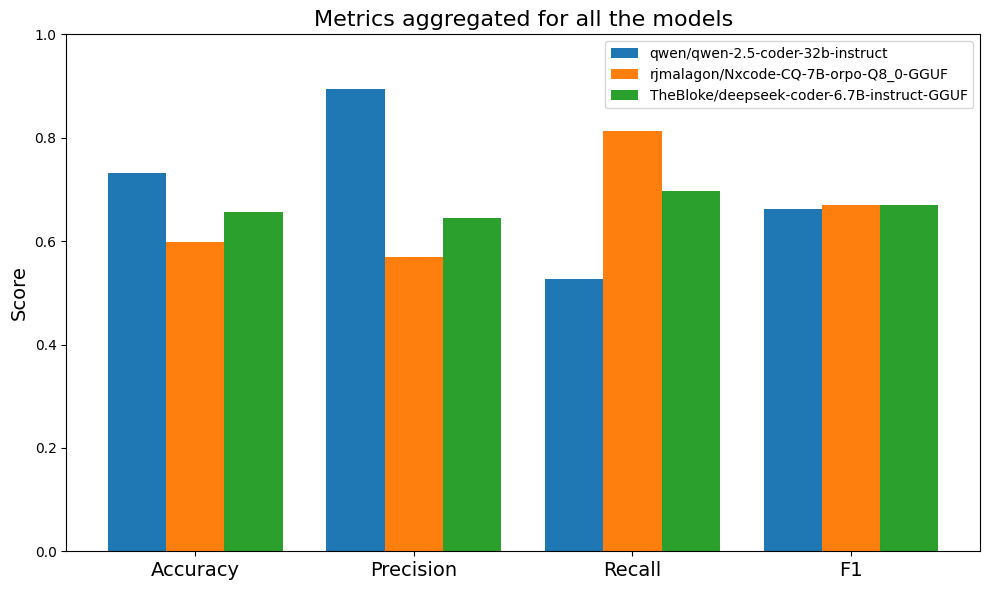

In [145]:
metric_names = list(next(iter(model_metrics_wo_cm.values())).keys())
metric_names.remove("mcc")
metric_names.remove("confusion_matrix")
print(metric_names)
x = np.arange(len(metric_names))
width = 0.8 / len(models)  # total width ~0.8, split across models

plt.figure(figsize=(10, 6))

for i, model in enumerate(models):
    scores = [model_metrics_wo_cm[model][m] for m in metric_names]
    plt.bar(x + (i - (len(models) - 1) / 2) * width, scores, width, label=model)

# plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xticks(x, [s.title() for s in metric_names], fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Score", fontsize=14)
plt.title("Metrics aggregated for all the models", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
avg_type_metrics

{'code': {'accuracy': 0.7063,
  'precision': 0.7278,
  'recall': 0.7758,
  'f1': 0.728,
  'mcc': 0.4399},
 'uml': {'accuracy': 0.6972,
  'precision': 0.7408,
  'recall': 0.6893,
  'f1': 0.6887,
  'mcc': 0.4167}}

In [ ]:
type_metrics_wo_cm = copy.deepcopy(avg_type_metrics)
# for key in type_metrics_wo_cm.keys():
#     del type_metrics_wo_cm[key]["confusion_matrix"]

metric_names = list(next(iter(type_metrics_wo_cm.values())).keys())
print(metric_names)
x = np.arange(len(metric_names))
width = 0.8 / len(models)  # total width ~0.8, split across models

plt.figure(figsize=(10, 6))

for i, output_type in enumerate(outputs):
    scores = [type_metrics_wo_cm[output_type][m] for m in metric_names]
    plt.bar(x + (i - (len(models) - 1) / 2) * width, scores, width, label=output_type)

plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xticks(x, metric_names)
plt.ylim(-1, 1)
plt.ylabel("Score")
plt.title("Metrics per Model")
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'confusion_matrix'

In [61]:
avg_model_type_metrics = {}

for model in models:
    for type in outputs:
        print(model, type)
        model_dicts = []
        for key in metrics.keys():
            if model in key and type in key:
                print(key)
                model_dicts.append(metrics[key])

        avg = {
            key: round(sum(d[key] for d in model_dicts) / len(model_dicts), 4)
            for key in model_dicts[0].keys()
            if key != "confusion_matrix"
        }

        avg_model_type_metrics[(model,type)] = avg

qwen/qwen-2.5-coder-32b-instruct code
('code', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter')
('code', 'qwen/qwen-2.5-coder-32b-instruct', 'singleton')
qwen/qwen-2.5-coder-32b-instruct uml
('uml', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter')
('uml', 'qwen/qwen-2.5-coder-32b-instruct', 'singleton')
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF code
('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter')
('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton')
rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF uml
('uml', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter')
('uml', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton')
TheBloke/deepseek-coder-6.7B-instruct-GGUF code
('code', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter')
('code', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton')
TheBloke/deepseek-coder-6.7B-instruct-GGUF uml
('uml', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter')
('uml', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton')


In [62]:
avg_model_type_metrics

{('qwen/qwen-2.5-coder-32b-instruct', 'code'): {'accuracy': 0.7912,
  'precision': 0.92,
  'recall': 0.6288,
  'f1': 0.7436,
  'mcc': 0.6129},
 ('qwen/qwen-2.5-coder-32b-instruct', 'uml'): {'accuracy': 0.793,
  'precision': 0.906,
  'recall': 0.6476,
  'f1': 0.7238,
  'mcc': 0.6232},
 ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'code'): {'accuracy': 0.5984,
  'precision': 0.5635,
  'recall': 0.8685,
  'f1': 0.6831,
  'mcc': 0.2384},
 ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'uml'): {'accuracy': 0.61,
  'precision': 0.5789,
  'recall': 0.8068,
  'f1': 0.6738,
  'mcc': 0.2408},
 ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'code'): {'accuracy': 0.7294,
  'precision': 0.6998,
  'recall': 0.8301,
  'f1': 0.7574,
  'mcc': 0.4684},
 ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'uml'): {'accuracy': 0.6887,
  'precision': 0.7375,
  'recall': 0.6136,
  'f1': 0.6684,
  'mcc': 0.3862}}

['accuracy', 'precision', 'recall', 'f1', 'mcc']


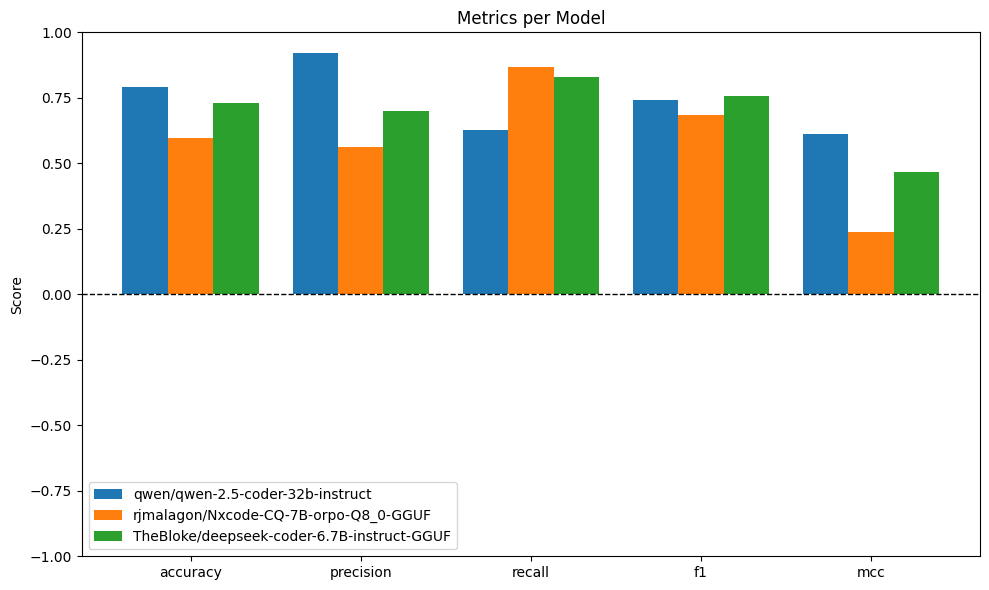

In [64]:
# Model performances on Code
mt_metrics_wo_cm = copy.deepcopy(avg_model_type_metrics)
# for key in mt_metrics_wo_cm.keys():
#     del mt_metrics_wo_cm[key]["confusion_matrix"]

metric_names = list(next(iter(mt_metrics_wo_cm.values())).keys())
print(metric_names)
x = np.arange(len(metric_names))
width = 0.8 / len(models)  # total width ~0.8, split across models

plt.figure(figsize=(10, 6))

for i, model in enumerate(models):
    scores = [mt_metrics_wo_cm[(model, "code")][m] for m in metric_names]
    plt.bar(x + (i - (len(models) - 1) / 2) * width, scores, width, label=model)

plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xticks(x, metric_names)
plt.ylim(-1, 1)
plt.ylabel("Score")
plt.title("Metrics per Model")
plt.legend()
plt.tight_layout()
plt.show()

['accuracy', 'precision', 'recall', 'f1', 'mcc']


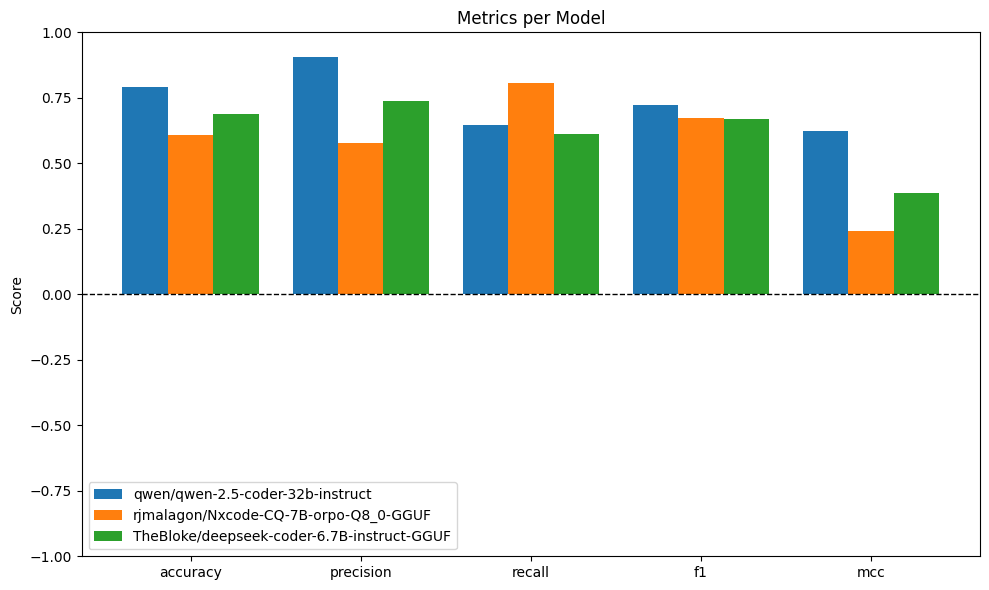

In [ ]:
# Model performances on UML
mt_metrics_wo_cm = copy.deepcopy(avg_model_type_metrics)
# for key in mt_metrics_wo_cm.keys():
#     del mt_metrics_wo_cm[key]["confusion_matrix"]

metric_names = list(next(iter(mt_metrics_wo_cm.values())).keys())
print(metric_names)
x = np.arange(len(metric_names))
width = 0.8 / len(models)  # total width ~0.8, split across models

plt.figure(figsize=(10, 6))

for i, model in enumerate(models):
    scores = [mt_metrics_wo_cm[(model, "uml")][m] for m in metric_names]
    plt.bar(x + (i - (len(models) - 1) / 2) * width, scores, width, label=model)


# plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xticks(x, metric_names)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Metrics per Model")
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
avg_pattern_metrics = {}
patterns = ["adapter", "singleton"]

for pattern in patterns:
    print(pattern)
    model_dicts = []
    for key in metrics.keys():
        if pattern in key:
            print(key)
            model_dicts.append(metrics[key])

    avg = {
        key: round(sum(d[key] for d in model_dicts) / len(model_dicts), 4)
        for key in model_dicts[0].keys()
        if key != "confusion_matrix"
    }

    avg_pattern_metrics[pattern] = avg

adapter
('code', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter')
('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter')
('code', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter')
('uml', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter')
('uml', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter')
('uml', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter')
singleton
('code', 'qwen/qwen-2.5-coder-32b-instruct', 'singleton')
('code', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton')
('code', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton')
('uml', 'qwen/qwen-2.5-coder-32b-instruct', 'singleton')
('uml', 'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton')
('uml', 'TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton')


In [68]:
avg_pattern_metrics

{'adapter': {'accuracy': 0.6279,
  'precision': 0.6754,
  'recall': 0.6318,
  'f1': 0.6195,
  'mcc': 0.2834},
 'singleton': {'accuracy': 0.7757,
  'precision': 0.7932,
  'recall': 0.8333,
  'f1': 0.7973,
  'mcc': 0.5732}}

['accuracy', 'precision', 'recall', 'f1', 'mcc']


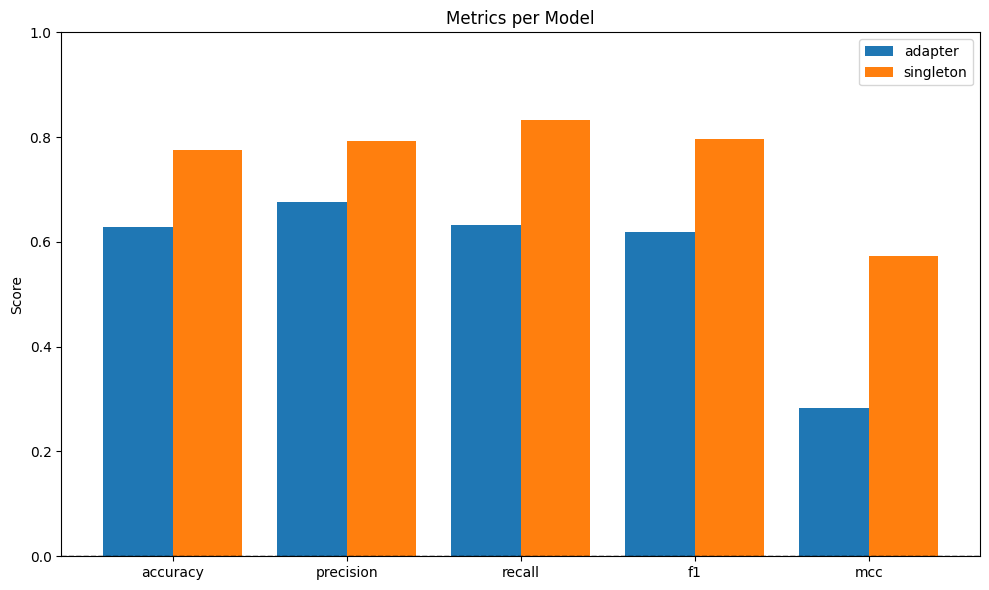

In [93]:
pattern_metrics_wo_cm = copy.deepcopy(avg_pattern_metrics)
# for key in pattern_metrics_wo_cm.keys():
#     del pattern_metrics_wo_cm[key]["confusion_matrix"] 

metric_names = list(next(iter(pattern_metrics_wo_cm.values())).keys())
print(metric_names)
x = np.arange(len(metric_names))
width = 0.8 / len(patterns)  # total width ~0.8, split across patterns

plt.figure(figsize=(10, 6))

for i, model in enumerate(patterns):
    scores = [pattern_metrics_wo_cm[model][m] for m in metric_names]
    plt.bar(x + (i - (len(patterns) - 1) / 2) * width, scores, width, label=model)

plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xticks(x, metric_names)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Metrics per Model")
plt.legend()
plt.tight_layout()
plt.show()

In [118]:
avg_model_type_metrics = {}
ordered_patterns = ["singleton", "adapter"]
correctness = ["correct", "incorrect"]


for model in models:
    for type in outputs:
        # print(model, pattern)
        y_true = []
        y_pred = []
        for correct in correctness:
            for pattern in ordered_patterns:
                # print(correct, type)
                y_true += [
                    mapping[v]
                    for v in true_labels[type][model][correct][pattern].iloc[:, 0]
                ]

                y_pred += [
                    mapping[v]
                    for v in predicted_labels[type][model][correct][pattern].iloc[:, 0]
                ]

        # print(f1_score(y_true, y_pred))
        avg_model_type_metrics[model, type] = round(
            float(f1_score(y_true, y_pred)), 4
        )

{('qwen/qwen-2.5-coder-32b-instruct', 'code'): 0.6813, ('qwen/qwen-2.5-coder-32b-instruct', 'uml'): 0.6437, ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'code'): 0.6714, ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'uml'): 0.6667, ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'code'): 0.7244, ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'uml'): 0.6038}


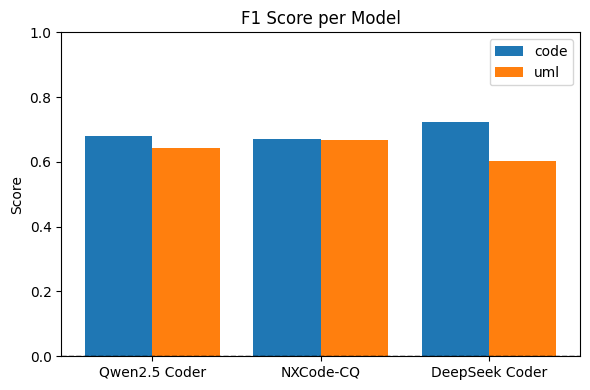

In [125]:
temp_models = ["Qwen2.5 Coder", "NXCode-CQ", "DeepSeek Coder"]

# Model performances on UML
mt_metrics_wo_cm = copy.deepcopy(avg_model_type_metrics)
print(mt_metrics_wo_cm)
# for key in mt_metrics_wo_cm.keys():
# del mt_metrics_wo_cm[key]["confusion_matrix"]

metric_names = ["f1"]
# print(metric_names)
x = np.arange(len(temp_models))
width = 0.8 / len(outputs)  # total width ~0.8, split across temp_models

plt.figure(figsize=(6, 4))

for i, type in enumerate(outputs):
    scores = [mt_metrics_wo_cm[(model, type)] for model in models]
    plt.bar(x + (i - (len(outputs) - 1) / 2) * width, scores, width, label=type)


plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xticks(x, temp_models)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("F1 Score per Model")
plt.legend()
plt.tight_layout()
plt.show()

In [116]:
avg_model_pattern_metrics = {}
ordered_patterns = ["singleton", "adapter"]
correctness = ["correct", "incorrect"]


for model in models:
    for pattern in ordered_patterns:
        # print(model, pattern)
        y_true = []
        y_pred = []
        for correct in correctness:
            for type in outputs:
                # print(correct, type)
                y_true += [
                    mapping[v] for v in true_labels[type][model][correct][pattern].iloc[:, 0]
                ]
                
                y_pred += [
                    mapping[v] for v in predicted_labels[type][model][correct][pattern].iloc[:, 0]
                ]
        
        # print(f1_score(y_true, y_pred))
        avg_model_pattern_metrics[model,pattern] = round(float(f1_score(y_true, y_pred)), 4)

{('qwen/qwen-2.5-coder-32b-instruct', 'singleton'): 0.898, ('qwen/qwen-2.5-coder-32b-instruct', 'adapter'): 0.5736, ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton'): 0.697, ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter'): 0.6602, ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton'): 0.8, ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter'): 0.6339}


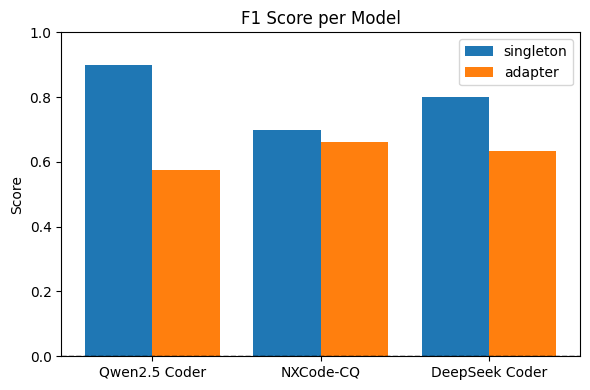

In [121]:
# avg_model_pattern_metrics = {}
# ordered_patterns = ["singleton", "adapter"]

# for model in models:
#     for pattern in ordered_patterns:
#         # print(model, pattern)
#         model_dicts = []
#         for key in metrics.keys():
#             if model in key and pattern in key:
#                 # print(key)
#                 model_dicts.append(metrics[key])

#         avg = {
#             key: round(sum(d[key] for d in model_dicts) / len(model_dicts), 4)
#             for key in model_dicts[0].keys()
#             if key != "confusion_matrix"
#         }
        

#         avg_model_pattern_metrics[(model, pattern)] = avg

print(avg_model_pattern_metrics)
temp_models = ["Qwen2.5 Coder", "NXCode-CQ", "DeepSeek Coder"]

# Model performances on UML
mp_metrics_wo_cm = copy.deepcopy(avg_model_pattern_metrics)
# for key in mp_metrics_wo_cm.keys():
#     del mp_metrics_wo_cm[key]["confusion_matrix"]

metric_names = ["f1"]
# print(metric_names)
x = np.arange(len(temp_models))
width = 0.8 / len(ordered_patterns)  # total width ~0.8, split across temp_models

plt.figure(figsize=(6, 4))

for i, pattern in enumerate(ordered_patterns):
    scores = [mp_metrics_wo_cm[(model, pattern)] for model in models]
    plt.bar(x + (i - (len(ordered_patterns) - 1) / 2) * width, scores, width, label=pattern)


plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xticks(x, temp_models)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("F1 Score per Model")
plt.legend()
plt.tight_layout()
plt.show()

In [122]:
avg_model_pattern_metrics

# needed_metrics = ["accuracy", "precision", "recall", "f1"]
# ordered_patterns = ['singleton', 'adapter']

# for model in models:
#     copy_string = ""
#     for pattern in ordered_patterns:
#         print(model, pattern)
#         metric_values = avg_model_pattern_metrics[model, pattern]
#         for needed_metric in needed_metrics:
#             copy_string+=f"& {round(metric_values[needed_metric]*100, 2)}\\% "
#     print(copy_string)

{('qwen/qwen-2.5-coder-32b-instruct', 'singleton'): 0.898,
 ('qwen/qwen-2.5-coder-32b-instruct', 'adapter'): 0.5736,
 ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'singleton'): 0.697,
 ('rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF', 'adapter'): 0.6602,
 ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'singleton'): 0.8,
 ('TheBloke/deepseek-coder-6.7B-instruct-GGUF', 'adapter'): 0.6339}

In [123]:
metrics

{('code', 'qwen/qwen-2.5-coder-32b-instruct', 'adapter'): {'accuracy': 0.6977,
  'precision': 0.84,
  'recall': 0.4884,
  'f1': 0.6176,
  'mcc': 0.4353,
  'confusion_matrix': array([[39,  4],
         [22, 21]])},
 ('code',
  'qwen/qwen-2.5-coder-32b-instruct',
  'singleton'): {'accuracy': 0.8846, 'precision': 1.0, 'recall': 0.7692, 'f1': 0.8696, 'mcc': 0.7906, 'confusion_matrix': array([[13,  0],
         [ 3, 10]])},
 ('code',
  'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF',
  'adapter'): {'accuracy': 0.5814, 'precision': 0.5556, 'recall': 0.814, 'f1': 0.6604, 'mcc': 0.1839, 'confusion_matrix': array([[15, 28],
         [ 8, 35]])},
 ('code',
  'rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF',
  'singleton'): {'accuracy': 0.6154, 'precision': 0.5714, 'recall': 0.9231, 'f1': 0.7059, 'mcc': 0.2928, 'confusion_matrix': array([[ 4,  9],
         [ 1, 12]])},
 ('code',
  'TheBloke/deepseek-coder-6.7B-instruct-GGUF',
  'adapter'): {'accuracy': 0.6512, 'precision': 0.614, 'recall': 0.814, 'f1': 0.7, 'mcc'

In [124]:
needed_metrics = ["accuracy", "precision", "recall", "f1"]
ordered_patterns = ['singleton', 'adapter']

for type in outputs:
    print(type)
    for model in models:
        print(model)
        copy_string = ""
        for pattern in ordered_patterns:
            print(type, model, pattern)
            metric_values = metrics[type, model, pattern]
            for needed_metric in needed_metrics:
                copy_string+=f"& {round(metric_values[needed_metric]*100, 2)}\\% "
        print("\n"+copy_string+"\n") 

code
qwen/qwen-2.5-coder-32b-instruct
code qwen/qwen-2.5-coder-32b-instruct singleton
code qwen/qwen-2.5-coder-32b-instruct adapter

& 88.46\% & 100.0\% & 76.92\% & 86.96\% & 69.77\% & 84.0\% & 48.84\% & 61.76\% 

rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF
code rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF singleton
code rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF adapter

& 61.54\% & 57.14\% & 92.31\% & 70.59\% & 58.14\% & 55.56\% & 81.4\% & 66.04\% 

TheBloke/deepseek-coder-6.7B-instruct-GGUF
code TheBloke/deepseek-coder-6.7B-instruct-GGUF singleton
code TheBloke/deepseek-coder-6.7B-instruct-GGUF adapter

& 80.77\% & 78.57\% & 84.62\% & 81.48\% & 65.12\% & 61.4\% & 81.4\% & 70.0\% 

uml
qwen/qwen-2.5-coder-32b-instruct
uml qwen/qwen-2.5-coder-32b-instruct singleton
uml qwen/qwen-2.5-coder-32b-instruct adapter

& 92.31\% & 92.31\% & 92.31\% & 92.31\% & 66.28\% & 88.89\% & 37.21\% & 52.46\% 

rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF
uml rjmalagon/Nxcode-CQ-7B-orpo-Q8_0-GGUF singleton
uml rjmalagon/Nxcode-CQ

# 3 Main Points
- Code > UML on a whole
-  Qwen > DS > CQ on a whole
-  Singleton > Adapter on a whole
- 4-panel graph of f1 scores bar graph (code vs uml) and (singleton vs adapter) across all models

# Discussion
- Whatever important outside these results first 1-2 paragraph
- What could have been done better 1-2 paragraph (provide more files, limitations, summary desc, more patterns)


## Include methodology diagram
## Analysis details (accuracy, f1, precision, recall)